# Assignment 2: Obesity Diagnosis based on eating Habits and physical condition

Student Name:Yuqing Zhou

Student ID:1140794

#### <b>Due date</b>: Monday, 6 September 2021 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day (both week and weekend days counted up to 5 days)
<ul>
    <li>one day late, -1.5;</li>
    <li>two days late, -3.0;</li>
    <li>three days late, -4.5;</li>
    <li>four days late, -6.0;</li>
    <li>five days late, -7.5;</li>
</ul>

<b>Marks</b>: 15% of mark for class. 


<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/105477/pages/python-and-jupyter-notebooks?module_item_id=2613813) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages Numpy, Scipy, Scikit-Learn. The instructions for each question will state what libraries you can use; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. While the main focus is on correctness of your methods, you will lose marks if your code is not understandable.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourage you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

## Overview

In this assignment, you will be working with *obesity* dataset containing data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 16 attributes describing 2111 patients. The dataset provided for this assignment is derived from <a href="https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#">this</a> resource. Your task is to predict whether a patient is considered obese (mass body index >=30) or not (mass body index <30).

The attributes are

|ID|Feature Name| Feature Type | Feature Values|
| :-| :-| :-| :-|
|0|Gender| categorical | Female: 0, Male: 1|
|1|Age| continuous | |
|2|Height| continuous | |
|3|Weight| continuous | ? |
|4|family_history| categorical | yes: 1, no: 0|
|5|FACV| categorical | yes: 1, no: 0|
|6|FCVC| continuous | |
|7|NCP| continuous | |
|8|CAEC| categorical | Always: 0, Frequently: 1, Sometimes: 2, no:  3|
|9|SMOKE| categorical | yes: 1, no: 0|
|10|CH2O| continuous | |
|11|SCC| categorical | yes: 1, no: 0|
|12|FAF| continuous | |
|13|TUE| continuous | |
|14|CALC| categorical | Always: 0, Frequently: 1, Sometimes: 2, no:  3, ?|
|15|MTRANS| categorical | Automobile: 0, Bike: 1, Motorbike: 2, Public_Transportation: 3, Walking: 4, ?|

You can find out more about the individual attributes / values, and the origin of the data set in this <a href="https://www.sciencedirect.com/science/article/pii/S2352340919306985"> article</a>  


You will build a number of classifiers to predict whether a patient is obese or not based on the attributes above.


#### The following instructions hold for every question in the assignment
- leave the order of instances intact, i.e., do not shuffle the data
- do not change the names or types of variables provided by us in the code cells below
- '?' denotes a missing value, and you should treat it as instructed in Question 1-B.
- the mapping of categorical feature values to integers indicates how you should process your data in 1-C.

## Question 1: Loading and pre-processing the data [2 marks]

You were provided with two data files:

**obesity.train** contains about 1,688 training instances, one instance per line in comma-separated value (csv) format. Each line contains 17 fields. The first 16 fields correspond to the features listed above, the final field denotes the class label

**obesity.test** is formatted exactly like obesity.train, and contains about 423 further instances for evaluation.

### 1-A Read the data [0.25 marks]

First, you will read in the data and create train features, train labels, test features and test labels. Do not apply any data transformations in this step and keep the '?' as is. 

In [288]:
# load data

data = open("obesity.train",'r').readlines()
test_data = open("obesity.test",'r').readlines()
feature_names = ["gender","age","height","weight","family_history","FACV","FCVC","NCP","CAEC","smoke","CH2O","SCC","FAF","TUE","CALC","MTRANS"]

x_train = []
y_train = []
x_test = []
y_test = []

############################
## your code begins here
############################
for row in data:
    row = row.replace("\n","")
    row = row.split(',')
    feature_train = []
    
    for num in row[:16]:
        feature_train.append(num)
    x_train.append(feature_train)
    y_train.append(row[16])

        
for row in test_data:
    row = row.replace("\n","")
    row = row.split(',')
    feature_test = []

    for num in row[:16]:
        feature_test.append(num)
    x_test.append(feature_test)
    y_test.append(row[16])


############################
## your code ends here
############################

len(x_train), len(y_train), len(x_test), len(y_test), len(x_train[0]), len(x_test[0])


(1688, 1688, 423, 423, 16, 16)

<b>For your testing:</b>

In [289]:
assert len(x_train)==len(y_train)==1688
assert len(x_train[0])==len(x_test[0])==16
assert len(x_test)==len(y_test)==423
assert x_train[5][2] == '1.7544389999999999'
assert x_test[8][6] == '2.0'

### 1-B: Dealing with Missing Values [0.75 marks]

You will write <b>two functions</b> to replace missing values using the strategies below based on the different attribute types (categorical, continuous):

   * <b>Continuous features</b>: For each feature find the <b>average feature value</b> in the train dataset 
   * <b>Categorical features</b>: For each feature find the <b>most frequent value</b> in the train dataset 

and a <b>third function</b> that replaces the missing values in the train and test datasets with the most frequent (categorical features) and average values (continuous features) that you found in the train dataset.
 

**Your tasks**

You will implement three functions
1. `num_mean_feat`
<ul>
  <li>input:  instances with only continuous features</li>
  <li>output: a list containing the average value for each continuous feature (aka substitute values)</li>
</ul> 
    
2. `cat_most_feat`
<ul>
    <li>input: instances with only categorical features</li>
    <li>output: a list containing the most frequent feature value for each categorical feature (aka substitute values)</li>
</ul>

3. `transform` 
<ul>
    <li>input:
        <ul>
            <li>a list of instances</li>   
            <li>replacement list containing the substitute values for each feature</li>
        </ul>
    </li>
    <li>output: the transformed instances</li>
</ul>

<b> You should implement these functions from scratch yourself. You may use native Python libraries such as math, collections, or numpy to help you, but you may not use existing implementations.</b>

In [290]:
import copy
############################
## your code begins here
############################

def num_mean_fit(X):
    replacement = []
    ## insert your code here    
    import numpy as np
    feature = np.array(X).T
    for row in feature:
        n = 0
        total = 0
        for num in row:
            if num != "?":
                n = n+1
                total = total + float(num)
        feature_x = total/n
        replacement.append(feature_x)
    return replacement

def cat_most_fit(X):
    replacement = []
    
    ## insert your code here
    import numpy as np
    feature = np.array(X).T
    for row in feature:
        feature_x = max(list(row),key=list(row).count)
        replacement.append(feature_x)
    return replacement 

def transform(X, replacement):
    trans_X  = copy.deepcopy(X)       
       
    ## insert your code here
    for i in range(len(trans_X)):
        for j in range(len(trans_X[i])):
            if trans_X[i][j] =="?":
                trans_X[i][j] = replacement[j]
    return trans_X

############################
## your code ends here
############################   


<b>For your testing:</b>

In [291]:
assert cat_most_fit([['no','always'],['yes','always'],['yes','?']]) == ['yes','always']
assert num_mean_fit([[12,122,'?'],[21,150,78],[18,'?',79]]) == [17,136,78.5]
assert transform([[10,144,'?'],[92,'?',70]], [17,136,78.5]) == [[10, 144, 78.5], [92, 136, 70]]

### 1-C: Attribute Types [1 marks]

You will create four feature representations, based on the different attribute types (categorical, continuous) in the original *Obesity* data.

**Your tasks**

Denote with $I$ the number of training instances; $C$ the number of categorical features in the data set; $N$ the number of continuous features; $v_{f}$ the number of values for categorical feature $f$; and $v_{bin}$ the number of bins for continuous features. 

1. Create a train data set with only numeric features `x_train_num` (size $(I\times N)$); and equivalently a test data set `x_test_num`; the missing values in train and test must be replaced with the average feature value found in the train dataset

2. Create a train data set with only categorical features `x_train_cat` (size $(I\times C)$); and equivalently a test data set `x_test_cat`; the missing values in train and test must be replaced with the most frequent feature values in the train dataset; You need to convert the feature values in `x_train_cat` and `x_test_cat` to integers (as shown in the Overview table) to be able to further use them in the rest of your program

3. Create a train data set with both continuous `x_train_num` and a 1-hot representation of categorical features `x_train_1hot` and save into a variable called `x_train_num_full` (size $I \times (\sum_f v_{f}+N)$) where the first $\sum_f v_f$ columns represent the 1-hot encoded categorical features and the remaining columns the continuous features; and equivalently a test data set `x_test_num_full`

4. Create a train data set using both categorical features `x_train_cat` and discretized numeric features `x_train_disc`(use equal-width binning with 4 bins, $v_{bin}=4$) and save into a variable called `x_train_cat_full` (size $I\times (C+N)$); and equivalently a test data set `x_test_cat_full`; You need to convert the feature values in `x_train_cat_full` and `x_test_cat_full` to integers (as shown in the Overview table) to be able to further use them in the rest of your program.


You will create two lists of feature names for the full categorical and full continuous datasets.

1. Create a list of feature names (string) for the `x_{train,test}_num_full` dataset (size $C+N$).

2. Create a list of feature names (string) for the `x_{train,test}_cat_full` dataset (size $\sum_f v_{f}+N$).


**Note:** You may use classes and functions from ```scikit-learn```. You may use native Python libraries such as math, collections, or numpy to help you.

In [292]:
x_train_num = []
x_test_num = []

x_train_cat = []
x_test_cat = []

x_train_num_full = []
x_test_num_full = []

x_train_cat_full = []
x_test_cat_full = []

full_num_feature_names = []
full_cat_feature_names = []

################################
### Your code begins here ######
################################
import numpy as np
feature = np.array(x_train).T
# Extract continuous features from test Instances
num_id = [1,2,3,6,7,10,12,13]
for i in num_id:
    x_train_num.append(feature[i])
x_train_num = np.array(x_train_num).T.tolist()
replacement_num = num_mean_fit(x_train_num)
x_train_num = transform(x_train_num, replacement_num)
num_features_name = []
for i in num_id:
    num_features_name.append(feature_names[i])

# Handle continuous Features exception data in test instance
feature = np.array(x_test).T
for i in num_id:
    x_test_num.append(feature[i])
x_test_num = np.array(x_test_num).T.tolist()
x_test_num = transform(x_test_num, replacement_num)

# Extract categorical features from test Instances
feature = np.array(x_train).T
cat_id = [0,4,5,8,9,11,14,15]
for i in cat_id:
    x_train_cat.append(feature[i])
x_train_cat = np.array(x_train_cat).T.tolist()
replacement_cat = cat_most_fit(x_train_cat)
x_train_cat = transform(x_train_cat, replacement_cat)
cat_features_name = []
for i in cat_id:
    cat_features_name.append(feature_names[i])
    
# Handle categorical Features exception data in test instance
feature = np.array(x_test).T
for i in cat_id:
    x_test_cat.append(feature[i])
x_test_cat = np.array(x_test_cat).T.tolist()
x_test_cat = transform(x_test_cat, replacement_cat)

# create two lists of feature names
replacement_rule1 ={"Female":0, "Male":1 }
replacement_rule2 = {"yes":1, "no":0}
replacement_rule3 = {"Always":0, "Frequently":1, "Sometimes":2, "no":3}
replacement_rule4 = {"Automobile":0, "Bike":1, "Motorbike":2, "Public_Transportation":3, "Walking":4}
for oneline in x_test_cat:
    for i in range(len(oneline)):
        if i == 0:
            oneline[i] = replacement_rule1.get(oneline[i])
        elif i in [1,2,4,5]:
            oneline[i] = replacement_rule2.get(oneline[i])
        elif i in [3,6]:
            oneline[i] = replacement_rule3.get(oneline[i])
        elif i == 7:
            oneline[i] = replacement_rule4.get(oneline[i])
            
for oneline in x_train_cat:
    for i in range(len(oneline)):
        if i == 0:
            oneline[i] = replacement_rule1.get(oneline[i])
        elif i in [1,2,4,5]:
            oneline[i] = replacement_rule2.get(oneline[i])
        elif i in [3,6]:
            oneline[i] = replacement_rule3.get(oneline[i])
        elif i == 7:
            oneline[i] = replacement_rule4.get(oneline[i])

x_train_cat = np.array(x_train_cat).astype('int32')
x_test_cat = np.array(x_test_cat).astype('int32')
x_train_num = np.array(x_train_num).astype('float64')
x_test_num = np.array(x_test_num).astype('float64')

# Perform 1HOT conversion operation
from sklearn.preprocessing import OneHotEncoder
enc1 = OneHotEncoder()
x_train_1hot = enc1.fit(x_train_cat)
x_train_1hot = enc1.transform(x_train_cat).toarray()
x_train_num_full = np.hstack((x_train_1hot,x_train_num))

x_test_1hot = enc1.transform(x_test_cat).toarray()
x_test_num_full = np.hstack((x_test_1hot,x_test_num))

# discretized numeric features
from sklearn.preprocessing import KBinsDiscretizer
enc2 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy="uniform")
enc2.fit(x_train_num)

x_train_disc = enc2.transform(x_train_num)
x_train_cat_full = np.hstack((x_train_cat,x_train_disc))

x_test_disc = enc2.transform(x_test_num)
x_test_cat_full = np.hstack((x_test_cat,x_test_disc))
          
onehot_cat_name = enc1.get_feature_names(cat_features_name)
x_cat_name = np.hstack((cat_features_name,num_features_name))
x_num_name = np.hstack((onehot_cat_name,num_features_name))


################################
### Your code ends here ########
################################


<b>For your testing:</b>

In [293]:
assert len(x_train_cat[0])==8
assert len(x_train_num[0])==8
assert len(x_train_cat_full[0])==16
assert len(x_train_num_full[0])==31

## Question 2: A Weighted Random baseline [1.25 marks]

Implement a <b>weighted random</b> baseline that randomly assigns a class to each test instance, weighting the class assignment according to <b>class prior probabilities</b>, as introduced in the Evaluation lecture and discuss your results.

### 2-A: Implement a weighted random baseline [0.5 marks]

**Your tasks**

You will implement the baseline function
1. `weight_random`
<ul>
  <li>input:
      <ul>
          <li> test labels</li>
          <li> the prior probability of class "obese" </li>          
      </ul>
  </li>
  <li>output: error rate on the test (fraction of incorrect predictions)</li>          
</ul> 
    

<b> You should implement this function from scratch yourself. We have already imported the two functions that we assume you will need. Do not import any other function or library.</b>

In [294]:
from collections import Counter
from random import random

test_obese = y_test.count("obese")/len(y_test) ## calculate the fraction of obese patients in the test set 
prior_obese = y_train.count("obese")/len(y_train) ## calculate the prior probability of class obese in the train set
############################
## your code begins here
############################
def weight_random(y_test,prior_obese):
    error = 0    
    
    ## insert your code here
    label = []
    n = 0
    for i in range(len(y_test)):
        if random() > prior_obese:
            label.append("notObese")
        else:
            label.append("obese")
    for i in range(len(label)):
        if label[i] != y_test[i]:
            n = n+1
    error = n/len(y_test)
    return error 


############################
## your code ends here
############################

err = weight_random(y_test,prior_obese)
print("There are",test_obese*len(y_test),"obese and",(1-test_obese)*len(y_test),"non-obese test instances")
print("The prior probability of obese is", round(prior_obese,2))
print("The weighted random baseline's error is:", round(err,2))


##########################################
## insert code for for Question 2-B here:
##########################################
errors = 0
for i in range(1000):
    errors = errors + weight_random(y_test,prior_obese)
errors_mean = errors/1000
print("the mean value of 1000 times :", errors_mean)

There are 199.0 obese and 224.0 non-obese test instances
The prior probability of obese is 0.46
The weighted random baseline's error is: 0.51
the mean value of 1000 times : 0.4965981087470449


### 2-B: Weighted Random baseline Discussion [0.75 marks]

Repeat the random baseline 1000 times, what would be the <b>average error rate</b> of your weighted random baseline on the test dataset? You should update your code above in order to achieve this. Please indicate through comments which parts of the code are relevant to question 2B.

What would the error rate converge to (write a formula based on the prior probability of obese, `prior_obese`, and the fraction of obese samples in the test data, `test_obese`)?

Please limit your answer to 2-3 sentences

Q2-B)
The average error rate is 0.4982411347517732.
Error rate converge to test_obese * (1 - prior_obese) + (1-test_obese) * prior_obese.

## Question 3: One-R baseline [2.5 marks]

In this question you will implement the one-R baseline using a helper function and discuss your results. Please refer to the Evaluation lecture for One-R baseline. 

### Question 3-A: Implement a helper function [0.75 mark]

**Your tasks**

You will implement a function that calculates the error rate for each attribute if we select that attribute as the one rule for classification.
1. `feature_error`
<ul>
  <li>input:
      <ul>
          <li> features</li>
          <li> labels</li>
      </ul>
  </li>
  <li>output:
      <ul>
          <li> a dictionary of the form {feature: error rate on the train} where each 
        feature is denoted by its ID (position in the train dataset)</li>
          <li> a dictionary of the form {feature value: majority class label} where the majority class label is either "obese" or "notObese" and feature values are the best feature's possible values (feature with smallest error rate)</li>
      </ul>
    </li>   
</ul> 

<b> You should implement this function from scratch yourself. You may use native Python libraries like math, numpy, collections to help you, but you may not use existing implementations.</b>


In [295]:
############################
## your code begins here
############################

def feature_error(features, labels):
    feat_error = {}  
    feat_rule = {}
    
    ## insert your code here
    if len(features) != len(labels):
        print("failly match")
        return
    
    import numpy as np
    from collections import Counter
    features = np.array(features).T
    
    correct_most = 0
    for i in range(len(features)):
        feature_set = set(features[i])
        
        rule_temp = {}
        correct_time = 0
        for feature in feature_set:
            one_feature_list = []
            
            for j in range(len(features[i])):
                if features[i][j] == feature:
                    one_feature_list.append((features[i][j], labels[j]))
                    
            featureAndlabel = Counter(one_feature_list).most_common(1)[0][0]
            rule_temp[featureAndlabel[0]] = featureAndlabel[1]
            correct_time += Counter(one_feature_list).most_common(1)[0][1]
        
        if correct_most < correct_time:
            feat_rule = rule_temp
            correct_most = correct_time
        
        feat_error[i] = 1 - correct_time / len(labels)

    return feat_error, feat_rule

############################
## your code ends here
############################

<b>For your testing</b>

In [296]:
sample_features = [[2,2], [2,1], [4,2], [4,1]]
sample_labels = ["yes","yes","no","no"]
sample_error, sample_rule= feature_error(sample_features, sample_labels)

# where index 0 refers to "feature 1" and index 1 to "feature 2"
assert sample_error[0]==0.0
assert sample_error[1]==0.5

# where 2 and 4 refer to the values of the best feature 
# and "yes","no" to the majority class label
assert sample_rule == {2:"yes",4:"no"}

### Question 3-B: Implement One-R baseline [0.75 mark]

- Apply your `feature_error` function to the full training data *x_train_cat_full*, and determine the (i) feature with *highest* error rate and (ii) feature with *lowest* error rate. Store the name (string) of the corresponding highest/lowest error rate features in `highest_err_feature_name` and `lowest_err_feature_name`, respectively.

- The feature with *lowest* error will constitute your 1-R predictor, which you should use to predict the class labels for the *x_test_cat_full* (`one_r_predictions`)


In [297]:
one_r_predictions = []

highest_err_feature_name = "" # feature name with highest error
lowest_err_feature_name = "" # feature name with lowest error

############################
## your code begins here
############################
features_error, features_rule = feature_error(x_train_cat_full, y_train)

lowest_error = 1
highest_error = 0
lowest_error_index = -1
for key, value in features_error.items():
    if value > highest_error:
        highest_error = value
        highest_err_feature_name = x_cat_name[key]
        
    if value < lowest_error:
        lowest_error = value
        lowest_err_feature_name = x_cat_name[key]
        lowest_error_index = key

for one_line in x_test_cat_full:
    one_r_predictions.append(features_rule[one_line[lowest_error_index]])

############################
## your code ends here
############################

print(one_r_predictions[:10])
print(f"The feature with highest error is: {highest_err_feature_name}")
print(f"The feature with lowest error is: {lowest_err_feature_name}")


##########################################
## insert code for for Question 3-D here:
##########################################
print("The all codes are shown in 3_C part." )


['notObese', 'obese', 'notObese', 'notObese', 'notObese', 'notObese', 'obese', 'notObese', 'notObese', 'notObese']
The feature with highest error is: gender
The feature with lowest error is: weight
The all codes are shown in 3_C part.


### Question 3-C: Compute Mutual Information (MI) [0.5 mark]

You will calculate the mutual information between your features  *x_train_cat_full* and the class label and determine the (i) feature with *highest* MI and (ii) feature with *lowest* MI. Store the name (string) of the corresponding highest/lowest MI features in `highest_mi_feature_name` and `lowest_mi_feature_name`, respectively.

**Note:** You may use classes and functions from ```scikit-learn``` but make sure that you specify your dataset is categorical (discrete) otherwise it will be assumed that your data is numeric. 

The feature with highest MI is: weight
The feature with lowest MI is: gender


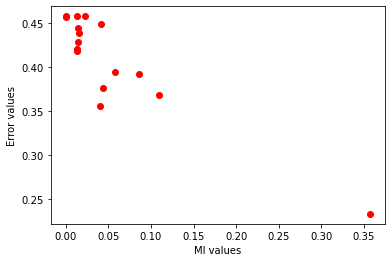

The correlation is: -0.9042499433493082


In [299]:
highest_mi_feature_name = "" # feature with highest MI
lowest_mi_feature_name = "" # feature with lowest MI

############################
## your code begins here
############################
from sklearn.feature_selection import mutual_info_classif

all_feature_mi = mutual_info_classif(x_train_cat_full, y_train, discrete_features=True)

all_feature_mi = all_feature_mi.tolist()
max_mutual_info = max(all_feature_mi)
min_mutual_info = min(all_feature_mi)

max_mutual_index = all_feature_mi.index(max_mutual_info)
min_mutual_index = all_feature_mi.index(min_mutual_info)

highest_mi_feature_name = x_cat_name[max_mutual_index]
lowest_mi_feature_name = x_cat_name[min_mutual_index]


############################
## your code ends here
############################

print(f"The feature with highest MI is: {highest_mi_feature_name}")
print(f"The feature with lowest MI is: {lowest_mi_feature_name}")


##########################################
## insert code for for Question 3-D here:
##########################################
import matplotlib.pyplot as plt

plt.plot(all_feature_mi, features_error.values(), 'ro')
plt.xlabel('MI values')
plt.ylabel('Error values')
plt.show()

import numpy as np
print("The correlation is:", np.corrcoef(all_feature_mi, list(features_error.values()))[1][0])



### Question 3-D: Discussion of One-R and Mutual Information [0.5 mark]
In addition to features leading to lowest/highest error rates and MI, inspect the MI and error rates for all 16 features. You should update your code above in order to achieve this. Please indicate through comments which parts of the code are relevant to question 3D.  

Are you finding different or somewhat similar patterns in the results? Explain the difference and similarity between MI and error rate formula in One-R?

Please limit your answer to 2-3 sentences

Q3-D)  
The correlation is: -0.9042499433493082. There is strong negative correlation between MI and error rate.
According to the formula of error rate and MI, we find that error rate only considers the overall error situation, but MI is used to measure the correlation between label and feature.

## Question 4: Naive Bayes [2 marks]

We will construct two Naive Bayes classifiers

1. One for instances with categorical attributes.
2. One for instances with numerical attributes.


For each classifier, you will 
1. Train it on the training set
2. Use the models to predict labels for the test set

### Question 4-A: Implementing the Naive Bayes classifiers [0.5 marks]

Implement two functions which train a NB classifier given the specified input feature types and predict labels for a given test set.

You may add additional quantities to your `return` statements.

<b> You may (and are, indeed, encouraged) to, use the existing NB implementations from `sklearn`. You should use the default parameterizations of these algorithms.</b> 
    
**Note:** If you choose to implement your classifiers from scratch, please use Laplace smoothing (alpha=1) for the categorical feature NB.




In [300]:
##################################
## your code begins here
##################################

def nb_cat_features(train_features, train_labels, test_features):
    predictions = []      
    
    ## insert your code here
    from sklearn.naive_bayes import CategoricalNB
    NB_Cate = CategoricalNB()
    NB_Cate.fit(train_features, train_labels)
    predictions = NB_Cate.predict(test_features)
    
    return predictions


def nb_num_features(train_features, train_labels, test_features):
    predictions = []
        
    ## insert your code here
    from sklearn.naive_bayes import GaussianNB
    NB_Gau = GaussianNB()
    NB_Gau.fit(train_features, train_labels)
    predictions = NB_Gau.predict(test_features)
    
    return predictions


############################
## your code ends here
############################



### Question 4-B: Apply your classifiers to the data sets you created in Questions 1 [0.5 marks]

...namely, the

1. categorical features `x_{train,test}_cat`
2. numerical features `x_{train,test}_num`
3. combined discretized numerical and categorical features `x_{train,test}_cat_full`
4. combined 1-hot categorical features and numerical `x_{train,test}_num_full` 


In [301]:
from collections import Counter

############################
## your code begins here
############################

cat_nb_predictions = nb_cat_features(x_train_cat, y_train, x_test_cat) # predictions for x_test_cat
num_nb_predictions = nb_num_features(x_train_num, y_train, x_test_num) # predictions for x_test_num
full_cat_nb_predictions = nb_cat_features(x_train_cat_full, y_train, x_test_cat_full) # predictions for x_test_cat_full
full_num_nb_predictions = nb_num_features(x_train_num_full, y_train, x_test_num_full) # predictions for x_test_num_full

############################
## your code ends here
############################

print(f"Numerical NB predicted class distribution \t {Counter(num_nb_predictions)}")
print(f"Categorical NB predicted class distribution\t {Counter(cat_nb_predictions)}")
print(f"Full Categorical NB predicted class distribution\t {Counter(full_cat_nb_predictions)}")
print(f"Full Numerical NB predicted class distribution\t {Counter(full_num_nb_predictions)}")


Numerical NB predicted class distribution 	 Counter({'notObese': 237, 'obese': 186})
Categorical NB predicted class distribution	 Counter({'obese': 261, 'notObese': 162})
Full Categorical NB predicted class distribution	 Counter({'notObese': 215, 'obese': 208})
Full Numerical NB predicted class distribution	 Counter({'obese': 261, 'notObese': 162})


### Question 4-C: Combining NB predictions [1 mark]

You are asked to construct another Naive Bayes classifier for instances with the full set of numerical *and* categorical attributes (no discretization and no one-hot encoding), ensuring that your classifier computes posterior class probabilities $p(y|x)$ as $p(x|y)p(y)$. Explain such Naive Bayes classifier implementation on the full attribute set (numerical and categorical features) 

Please limit your answer to 3-4 sentences

Q4-C)
A full set is divided into two parts, numerical attributes and categorical attributes. Numerical attributes and Categorical attributes use GaussianNB and Categorical to predict their corresponding posterior class probabilities respectively. Multiply the two obtained posterior classes probabilities to obtain full probabilities. Find the label with the highest probability and get the prediction result.

In [302]:
def nb_all(x_train_num, x_train_cat, x_test_num, x_test_cat, y_train):
    from sklearn.naive_bayes import GaussianNB
    num_NB = GaussianNB()
    num_NB.fit(x_train_num, y_train)
    num_prob = num_NB.predict_proba(x_test_num)

    from sklearn.naive_bayes import CategoricalNB
    cat_NB = CategoricalNB()
    cat_NB.fit(x_train_cat, y_train)
    cat_prob = cat_NB.predict_proba(x_test_cat)

    full_prob = cat_prob * num_prob
    prediction = []
    for oneLine in full_prob:
        if oneLine[0] > oneLine[1]:
            prediction.append('notObese')
        else:
            prediction.append('obese')
    
    return prediction

prediction = nb_all(x_train_num, x_train_cat, x_test_num, x_test_cat, y_train)
accuracy_score(y_test, prediction)

0.8534278959810875

## Question 5: Logistic Regression [1.25 marks]

1. First find the mean and standard deviation of values for each feature in `x_train_num_full` and then using the calculated mean and standard deviation values, standardize `x_{train,test}_num_full` such that each feature has mean=0 and std= 1. Store the standardized data to `x_{train,test}_norm_full`.

2. Implement a Logistic Regression classifier, and apply it to the standardized full numeric training data set (`x_{train,test}_norm_full`).

<b> You should use existing implementation in sklearn with default parameters for Logistic Regression. You may use classes and functions from ```scikit-learn``` for standardization.</b>

### Question 5-A: The Logistic Regression classifier [0.5 marks]


In [303]:
from sklearn.linear_model import LogisticRegression

lr_predictions = []
x_train_norm_full = []
x_test_norm_full = []
############################
## your code begins here
############################
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

SS.fit(x_train_num_full)
x_train_norm_full = SS.transform(x_train_num_full)
x_test_norm_full = SS.transform(x_test_num_full)

LR = LogisticRegression()
LR.fit(x_train_norm_full, y_train)
lr_predictions = LR.predict(x_test_norm_full)


############################
## your code ends here
############################
print(f"LR predicted class distribution\t {Counter(lr_predictions)}")


##########################################
## insert code for for Question 5-B here:
##########################################
highest_coef = sorted(LR.coef_[0].tolist(), key = abs, reverse=True)[0]
second_highest_coef = sorted(LR.coef_[0].tolist(), key = abs, reverse=True)[1]

highest_coef_i = LR.coef_[0].tolist().index(highest_coef)
second_highest_coef_i = LR.coef_[0].tolist().index(second_highest_coef)

highest_coef_name = x_num_name[highest_coef_i]
second_highest_coef_name = x_num_name[second_highest_coef_i]

print()
print("Feature Name, 1st coef:", highest_coef_name)
print(highest_coef_name + ":", highest_coef)
print("Feature Name, 1st MI:", highest_mi_feature_name)
print()

second_highest_mi_index = all_feature_mi.index(sorted(all_feature_mi, reverse=True)[1])
second_highest_mi_feature_name = x_cat_name[second_highest_mi_index]
print("Feature Name, 2nd coef:", second_highest_coef_name)
print(highest_coef_name + ":", second_highest_coef)
print("Feature Name, 2nd MI:", second_highest_mi_feature_name)

LR predicted class distribution	 Counter({'notObese': 227, 'obese': 196})

Feature Name, 1st coef: weight
weight: 6.407399558263892
Feature Name, 1st MI: weight

Feature Name, 2nd coef: height
weight: -1.6757072775038981
Feature Name, 2nd MI: family_history


### Question 5-B: Inspect the learned coefficients [0.75 marks]

**Part 1**
Inspect the coefficients (weights) learned by the classifier, and compare them to the features with the highest MI values in Question 3. You should update your code above in order to achieve this. Please indicate through comments which parts of the code are relevant to question 5B.

**Part 2**
What does a high coefficient for a feature imply? Report the two feature names for which your model learns the most important coefficients? Compare your answer to the highest MI features you detected in Q3.


Q5-B) 
The higher the coefficient is, the greater the influence of feature on label is.
The two features with the largest coefficient are weight and height.
The two features with the largest MI are weight and family_history.
The feature with the largest coefficient and MI is weight.

## Question 6: Evaluation [1 mark]

We will evaluate our baselines and classifiers on the instances in the test set. 

Compute 
- error rate
- macro-averaged F1 score 

for the One-R baselines, the four NB classifiers (on 4 datasets) and the LR classifier.

**You may use existing implementations and/or Python libraries like numpy, scipy or sklearn.**

In [304]:

one_r_err = 0
one_r_f1 = 0


num_nb_err = 0
num_nb_f1 = 0


cat_nb_err = 0
cat_nb_f1 = 0


full_cat_nb_err = 0
full_cat_nb_f1 = 0


full_num_nb_err = 0
full_num_nb_f1 = 0

lr_err = 0
lr_f1 = 0

############################
## your code begins here
############################
from sklearn.metrics import accuracy_score, f1_score

one_r_f1 = f1_score(y_test, one_r_predictions, average="macro")
num_nb_f1 = f1_score(y_test, num_nb_predictions, average="macro")
cat_nb_f1 = f1_score(y_test, cat_nb_predictions, average="macro")
full_cat_nb_f1 = f1_score(y_test, full_cat_nb_predictions, average="macro")
full_num_nb_f1 = f1_score(y_test, full_num_nb_predictions, average="macro")
lr_f1 = f1_score(y_test, lr_predictions, average="macro")

one_r_accuracy = accuracy_score(y_test, one_r_predictions)
one_r_err = 1 - one_r_acc

num_nb_accuracy = accuracy_score(y_test, num_nb_predictions)
num_nb_err = 1 - num_nb_acc

cat_nb_accuracy = accuracy_score(y_test, cat_nb_predictions)
cat_nb_err = 1 - cat_nb_acc

full_cat_nb_accuracy = accuracy_score(y_test, full_cat_nb_predictions)
full_cat_nb_err = 1 - full_cat_nb_acc

full_num_nb_accuracy = accuracy_score(y_test, full_num_nb_predictions)
full_num_nb_err = 1 - full_num_nb_acc

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_err = 1 - lr_acc


############################
## your code ends here
############################


print(f"One  R\t\tError: {round(one_r_err, 2)}\tMacro F1: {round(one_r_f1, 2)}")
print(f"NB Num \t\tError: {round(num_nb_err, 2)}\tMacro F1: {round(num_nb_f1, 2)}")
print(f"NB Cat \t\tError: {round(cat_nb_err, 2)}\tMacro F1: {round(cat_nb_f1, 2)}")
print(f"NB Num Full \tError: {round(full_num_nb_err, 2)}\tMacro F1: {round(full_num_nb_f1, 2)}")
print(f"NB Cat Full \tError: {round(full_cat_nb_err, 2)}\tMacro F1: {round(full_cat_nb_f1, 2)}")
print(f"LR \t\tError: {round(lr_err, 2)}\tMacro F1: {round(lr_f1, 2)}")

One  R		Error: 0.23	Macro F1: 0.74
NB Num 		Error: 0.13	Macro F1: 0.87
NB Cat 		Error: 0.21	Macro F1: 0.79
NB Num Full 	Error: 0.21	Macro F1: 0.79
NB Cat Full 	Error: 0.19	Macro F1: 0.81
LR 		Error: 0.06	Macro F1: 0.94


## Question 7: Discussion [5 marks] 

Critically analyze the performance of the models by answering the following questions. 

**(a)** The four Naive Bayes (NB) classifiers lead to different performance. Which of the four NB classifiers performs best, and why do you think it is the case? **[1 mark]**

**(b)** You used unstandardized data in your numeric Naive Bayes, what would be the effect of standardization on the results of numeric Naive Bayes? Why? **[0.75 mark]**

**(c)** You chose to use equal-width binning for your continuous features, discuss the drawbacks of considering this approach with a fixed bin number. Would you select a different binning strategy, and if so which? **[1 mark]**

**(d)** Assume that your best classifier will be deployed in a hospital to warn new patients if they are prone to obesity. You want to avoid falsely diagnosing a patient as obese. Can you reassure the hospital with the evaluation results in Q7 that your classifier is adequate? If not, describe an alternative evaluation metric and explain why it is more appropriate.**[0.75 mark]**

**(e)** Do you observe a clear difference in performance between NB and Logistic Regression (LR) in Q7? Referring to the number of parameters and assumptions underlying each model, provide one reason why NB might outperform LR, and one reason why LR might outperform NB. In your answer, refer back to the *Obesity* data set used in this assignment. **[1 mark]**

**(f)** Assume that you have access to a (hypothetical) infinitely large database (i.e., an enormous version of the Obesity data set used in this assignment). Is it true that Logistic Regression will achieve perfect test set performance? Why (not)? **[0.5 mark]**


<b>We expect a maximum of 2-3 sentences per question.

(a) Numeric NB performs best. Compared with numeric NB, other NB classiers have more features and have learned more noisy than useful information. It's difficult for NB to learn too many features, beacuse it's a simple machine learning model.


(b)There will be no impact. Standardization can adjust features' values in different ranges to 0-1. NB assumes that features are independent of each other, so the standardized features will not affect NB.


(c) The disadvantage of equal-width binning is that it is an unbanlanced bin and easy to be effected by extreme value. I prefer to use "kmeans" strategy which values in each bin have the same nearest center of a 1D k-means cluster.


(d)It is not adequate. I prefer to use Precision which function is (TP/ (TP + FP)). In order to avoid falsely diagnosing a patient as obese,we want to make it more likely that people who are considered obese are actually obese, and that's the definition of accuracy.


(e)Yes,it is clear different.

When there is correlation between instance features, LR is better than NB because there is no need to make independence assumption in LR. In our data, many features are correlated, such as height and weight.

When instance has many features, NB will be better than LR, because LR has a strong learning ability and may learn a lot of useless noise, resulting in overfitting. Our data now has 16 features, but as our features become more numerous, using logistic regression may result in overfitting.


(f)It may not perfect. LR is linear classifier because its decision boundary is linear. It is rarely to find data separate linearly in real word. The more data, the more outliers.



<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Yuqing Zhou
   
   <b>Dated</b>: 2021.9.7